In [1]:
# Import Statements
import numpy as np 
import matplotlib.pyplot as plt 
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# Set up data
revs = np.asarray([
    'The new Amazon Review Summary tool is so awesome! I love how it tells me exactly what I need about a product',
    'The Amazon Review Summary tool honestly changed my life. It has been the biggest blesing I could have asked for',
    'I don\'t know how I\'ve lived my life without this. The Amazon Review Summary Tool gets a 5 out of 5!',
    'I HATE the Amazon Review Summary tool. It\'s absolutely horrible. Do not use!',
    'The Amazon Review Summary tool honestly makes me want to jump off a bridge. Please do NOT use!',
    'If you use the Amazon Review Summary tool, you are honestly wasting your time. It is so so bad!',
])

In [3]:
# Encode articles 

In [4]:
# Loading model 
models = ['stsb-bert-base', 'stsb-roberta-base', 'stsb-bert-large', 'stsb-roberta-large']
model = SentenceTransformer(models[1])

In [5]:
# Retrieve vectors 
vecs = model.encode(revs)

In [6]:
# Running PCA on data 
pca = PCA(n_components = 5)
components = pca.fit_transform(vecs)
print('Percent variance explained: {:.2f}'.format(sum(pca.explained_variance_ratio_)))

Percent variance explained: 1.00


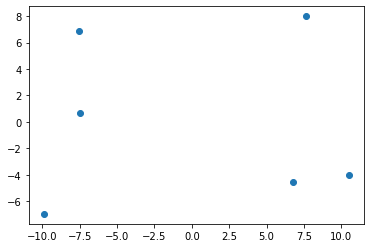

In [7]:
# Visualizing PCA
plt.scatter(components[:,0], components[:,1])

In [8]:
# Clustering 
K = 2
clusters = KMeans(n_clusters=K, random_state=0).fit(components)

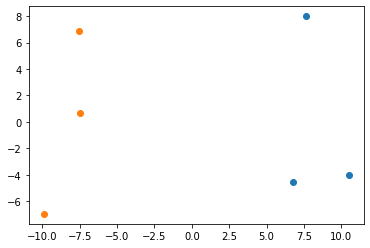

In [9]:
# Visualizing Clusters
for i in range(K):
    labels = clusters.labels_ == i
    plt.scatter(components[labels,0], components[labels,1])

In [10]:
# Printing out different clusters
for i in range(K):
    labels = clusters.labels_ == i
    print('Cluster #:', i)
    for j, review in enumerate(revs[labels]):
        print(j, review)

Cluster #: 0
0 I HATE the Amazon Review Summary tool. It's absolutely horrible. Do not use!
1 The Amazon Review Summary tool honestly makes me want to jump off a bridge. Please do NOT use!
2 If you use the Amazon Review Summary tool, you are honestly wasting your time. It is so so bad!
Cluster #: 1
0 The new Amazon Review Summary tool is so awesome! I love how it tells me exactly what I need about a product
1 The Amazon Review Summary tool honestly changed my life. It has been the biggest blesing I could have asked for
2 I don't know how I've lived my life without this. The Amazon Review Summary Tool gets a 5 out of 5!


In [11]:
# Finding review closest to each center 
centers = clusters.cluster_centers_
closest = [] 
for i in range(K):
    labels = clusters.labels_ == i
    dist = float('inf')
    closest_review = None 
    for review_vec, review in zip(components[labels],revs[labels]):
        dist_to_center = np.linalg.norm(review_vec - centers[i])
        if dist_to_center < dist:
            closest_review = review
    closest.append(review)
for i, r in enumerate(closest):
    print('Cluster Rep #', i, r)

Cluster Rep # 0 If you use the Amazon Review Summary tool, you are honestly wasting your time. It is so so bad!
Cluster Rep # 1 I don't know how I've lived my life without this. The Amazon Review Summary Tool gets a 5 out of 5!


In [12]:
# Summarize articles

# TODO: Summarize the articles O:

['If you use the Amazon Review Summary tool, you are honestly wasting your time. It is so so bad!',
 "I don't know how I've lived my life without this. The Amazon Review Summary Tool gets a 5 out of 5!"]